In [ ]:
# 维度-情感分类可视化
import matplotlib.pyplot as plt
from matplotlib import myconfig
import seaborn as sns
import pandas as pd
plt.style.use('mpl20')
config = myconfig.Config()

result=[]
pinpaiss= ['ALBD','AND','AT','BNL','GRN','LN','QPL','TB']
# pinpaiss= ['test']
id2label = {k: v.strip() for k, v in enumerate(open('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\label.txt', 'r', encoding='utf-8').readlines())}
for pinpai in pinpaiss:
    with open('D:/python_common/代码_感知质量大论文/公开数据处理/感知质量数据集/维度-情感分类结果/维度-情感分类结果_'+pinpai+'.tsv','r',encoding='utf-8') as f:
        data=f.readlines()
    df=pd.DataFrame(columns=['维度','品牌','情感'])

    Weidus=[]
    Pinpais=[pinpai]*(len(data))
    Qinggans=[]

    for each in data:
        ids,scores,review=each.split('\t')

        if ',' in ids:
            ids_ = ids.split(',')
            weidus = [id2label[int(i) % 12] for i in ids_]

            qinggan_ = scores.split('|')
            qinggans = []
            for each_qinggan in qinggan_:
                each_qinggan_ = each_qinggan.split(',')
                each_qinggan_ = sum([float(each_qinggan_[i])*(i-1) for i in range(0,len(each_qinggan_))])
                qinggans.append(each_qinggan_)
                Pinpais.append(pinpai)

        else:
            weidus=[id2label[int(ids)%12]]
            qinggans=[sum([float(each)*(i-1) for i,each in enumerate(scores.split(','))])]

        Weidus.extend(weidus)
        Qinggans.extend(qinggans)

    df['维度']=Weidus
    df['品牌']=Pinpais[:len(Weidus)]
    df['情感']=Qinggans
    result.append(df)
result=pd.concat(result);result2=result.copy()
# 根据品牌聚合
result=result.groupby(['品牌','维度'])['情感'].mean().reset_index()
result = result.rename(columns={'情感':'情\n感','维度':'维\n度'})

# 各维度情感占比
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 0.5})
g = sns.catplot(x="情\n感", y="维\n度",  col="品牌",data=result, kind="bar",height=4, aspect=1,legend=False,sharey=True,sharex=True,errorbar=None,alpha=1,edgecolor='black',col_wrap=3,palette='Blues_d')


Weidus = [each for each in g.axes[0].get_yticklabels() ]
g.set_xlabels('情感得分',fontfamily = config.chinese_fontfamily,fontsize=config.label_fontsize)
g.set_ylabels('维\n度',fontfamily = config.chinese_fontfamily,fontsize=config.label_fontsize,rotation=0,va='center',ha='center',rotation_mode='anchor')

g.set_titles("{col_name}",fontfamily = config.english_fontfamily)

g.set_yticklabels(Weidus,fontfamily = config.chinese_fontfamily,fontsize=config.ticks_fontsize)
g.set_xticklabels(fontfamily = config.english_fontfamily,fontsize=config.ticks_fontsize)
# g.set(xlim=(-1.5, 1.5))

# 获取当前y轴的刻度
y_ticks = g.axes[0, 0].get_yticks()

# 将所有的轴左移一个单位
new_y_ticks = [y - y_ticks[0]] + y_ticks[1:].tolist()

# 设置新的y轴刻度
for ax in g.axes.flat:
    ax.set_yticks(new_y_ticks)


plt.show()

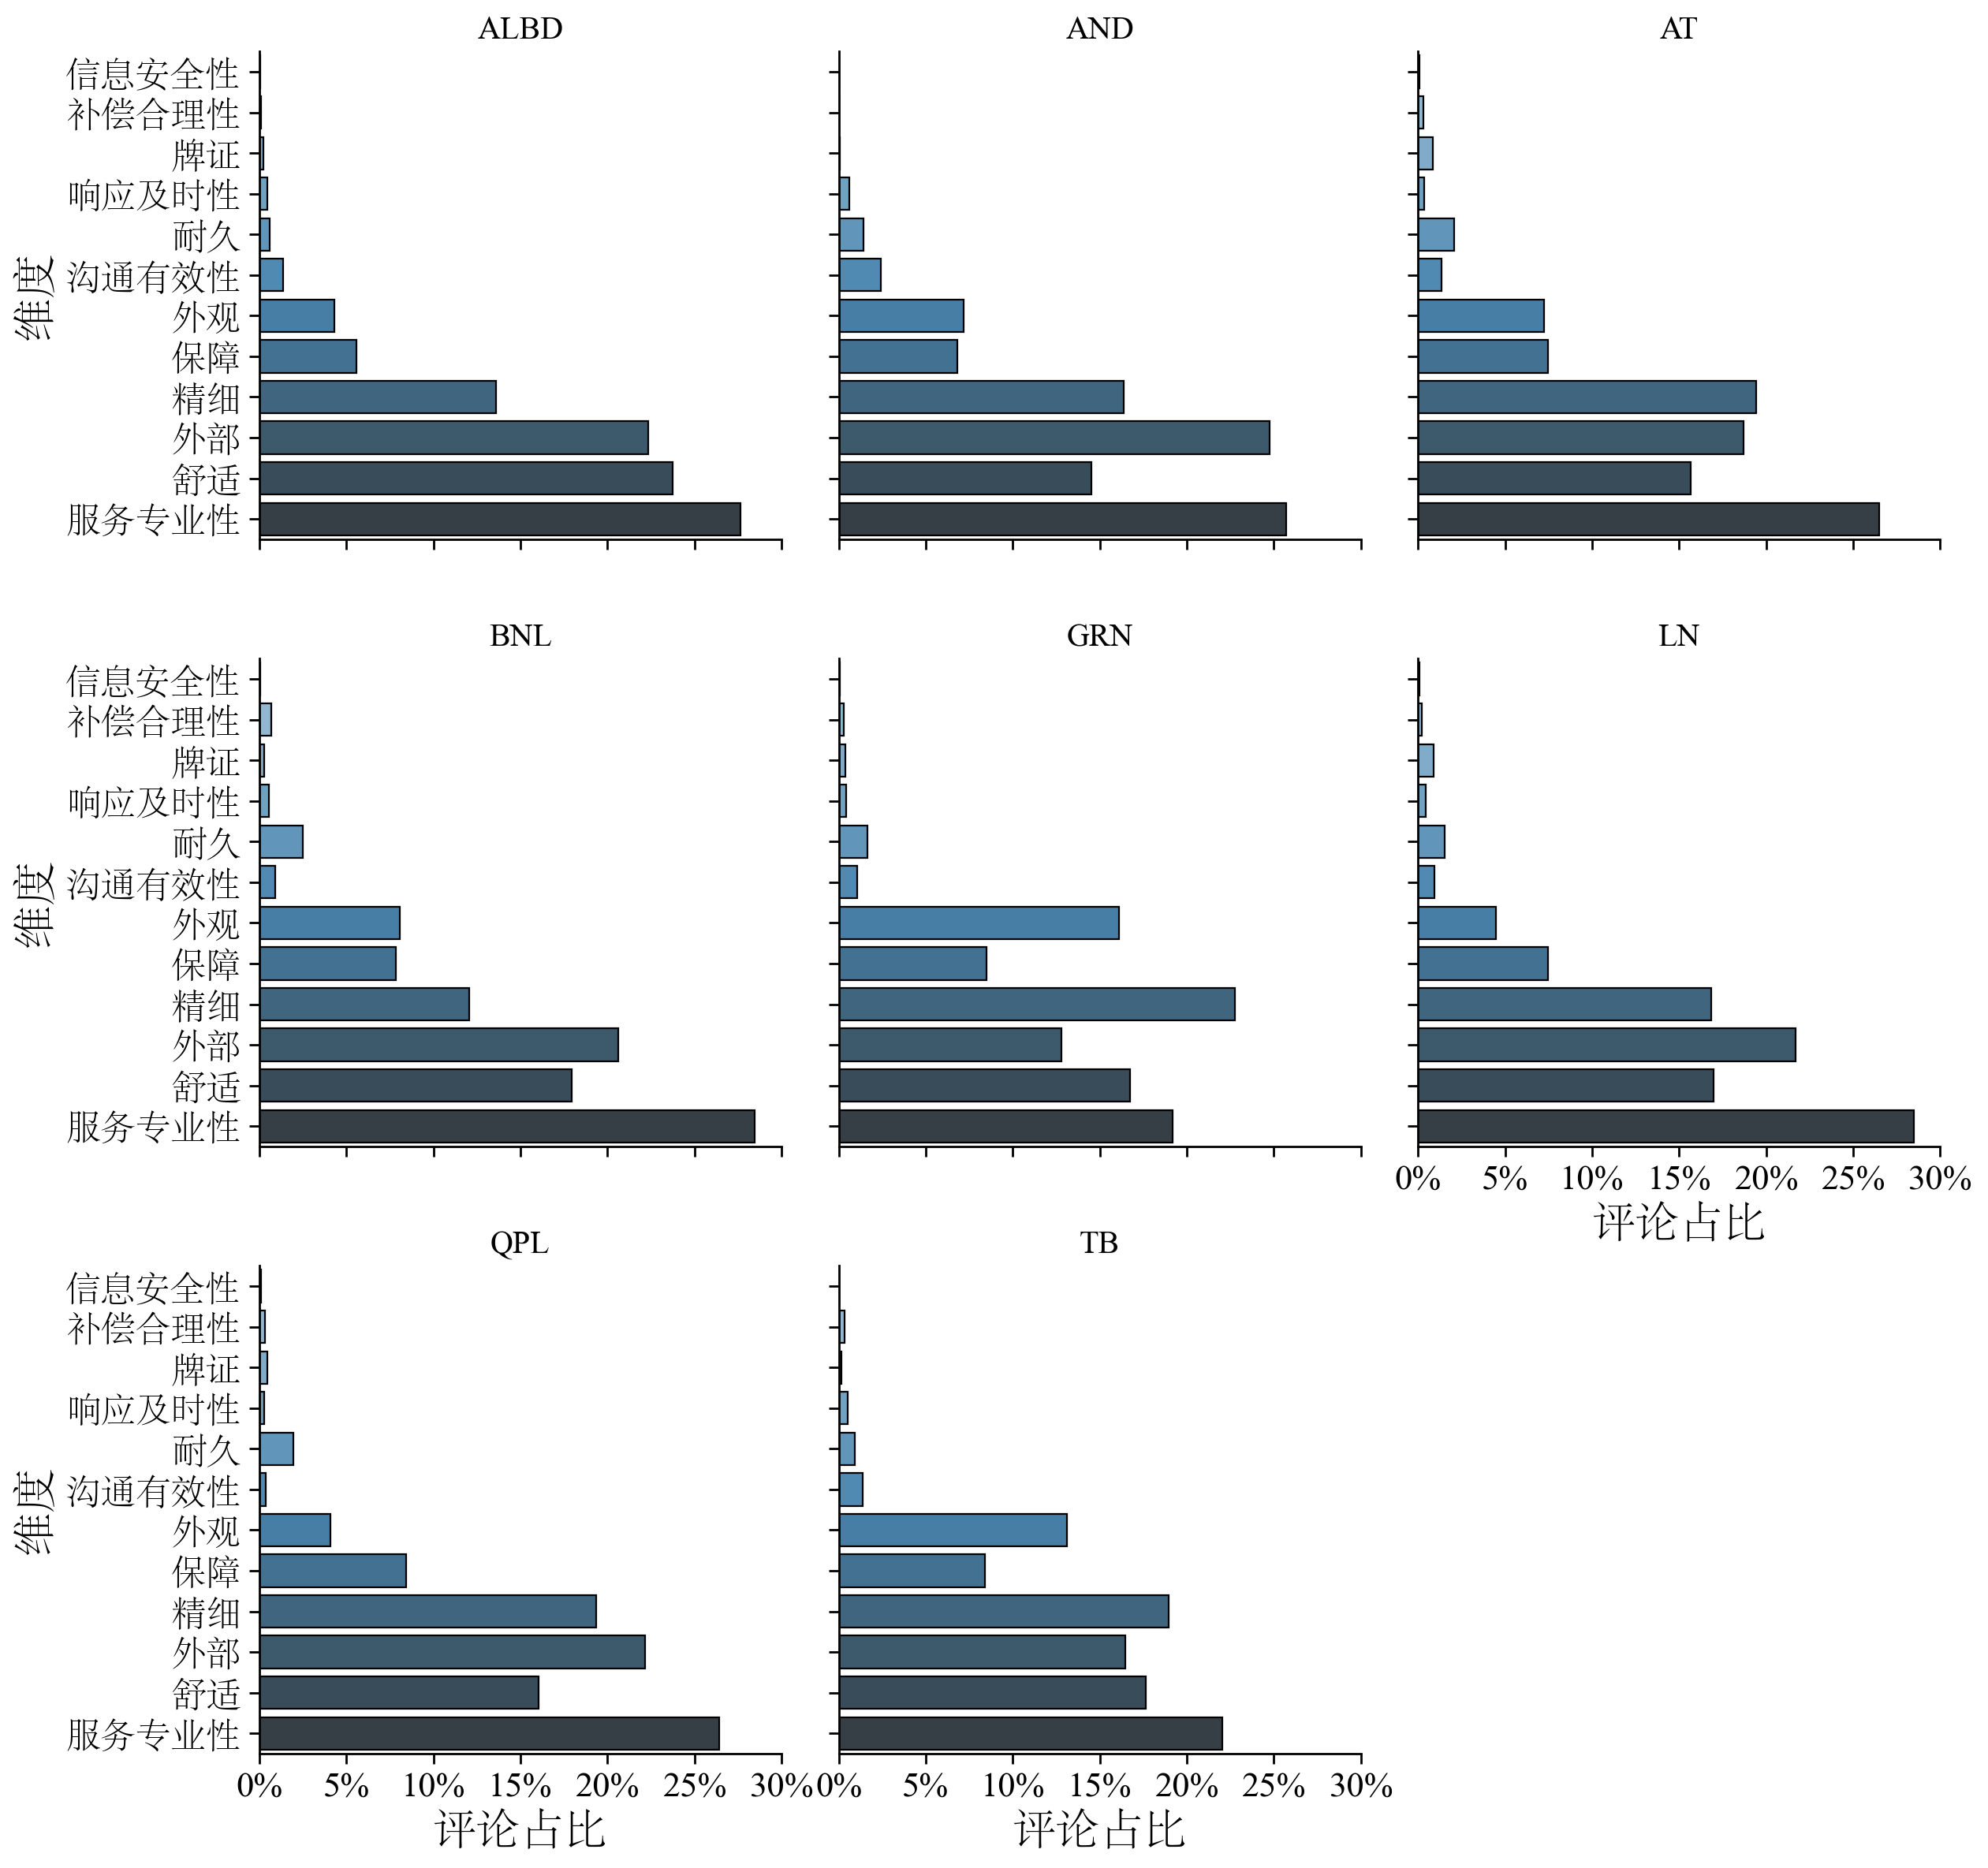

In [2]:
# 各维度占比
result3=result2.value_counts(['品牌','维度'],normalize=False,sort=False).reset_index()
result3.columns=['品牌','维度','数量占比']
result3['数量占比']=result3['数量占比']/result3.groupby(['品牌'])['数量占比'].transform('sum')
result3=result3.sort_values(['品牌','数量占比','维度'],ascending=True)
result3.reset_index(drop=True,inplace=True)
g = sns.catplot(x="数量占比", y="维度", col="品牌",data=result3, kind="bar",height=4, aspect=1,legend=True,legend_out=True,sharey=True,sharex=True,errorbar=None,alpha=1,edgecolor='black',palette='Blues_d',col_wrap=3)

Weidus = [each for each in g.axes[0].get_yticklabels()]
g.set_xlabels('评论占比',fontfamily = config.chinese_fontfamily,fontsize=config.label_fontsize)
g.set_ylabels('维度',fontfamily = config.chinese_fontfamily,fontsize=config.label_fontsize)
g.set_titles("{col_name}",fontfamily = config.english_fontfamily)
g.set_yticklabels(Weidus,fontfamily = config.chinese_fontfamily,fontsize=config.ticks_fontsize)
g.set_xticklabels(fontfamily = config.english_fontfamily,fontsize=config.ticks_fontsize)
g.set(xlim=(0, 0.3))
config.dpi_for_catplot(g)
config.transform_to_percent(g)

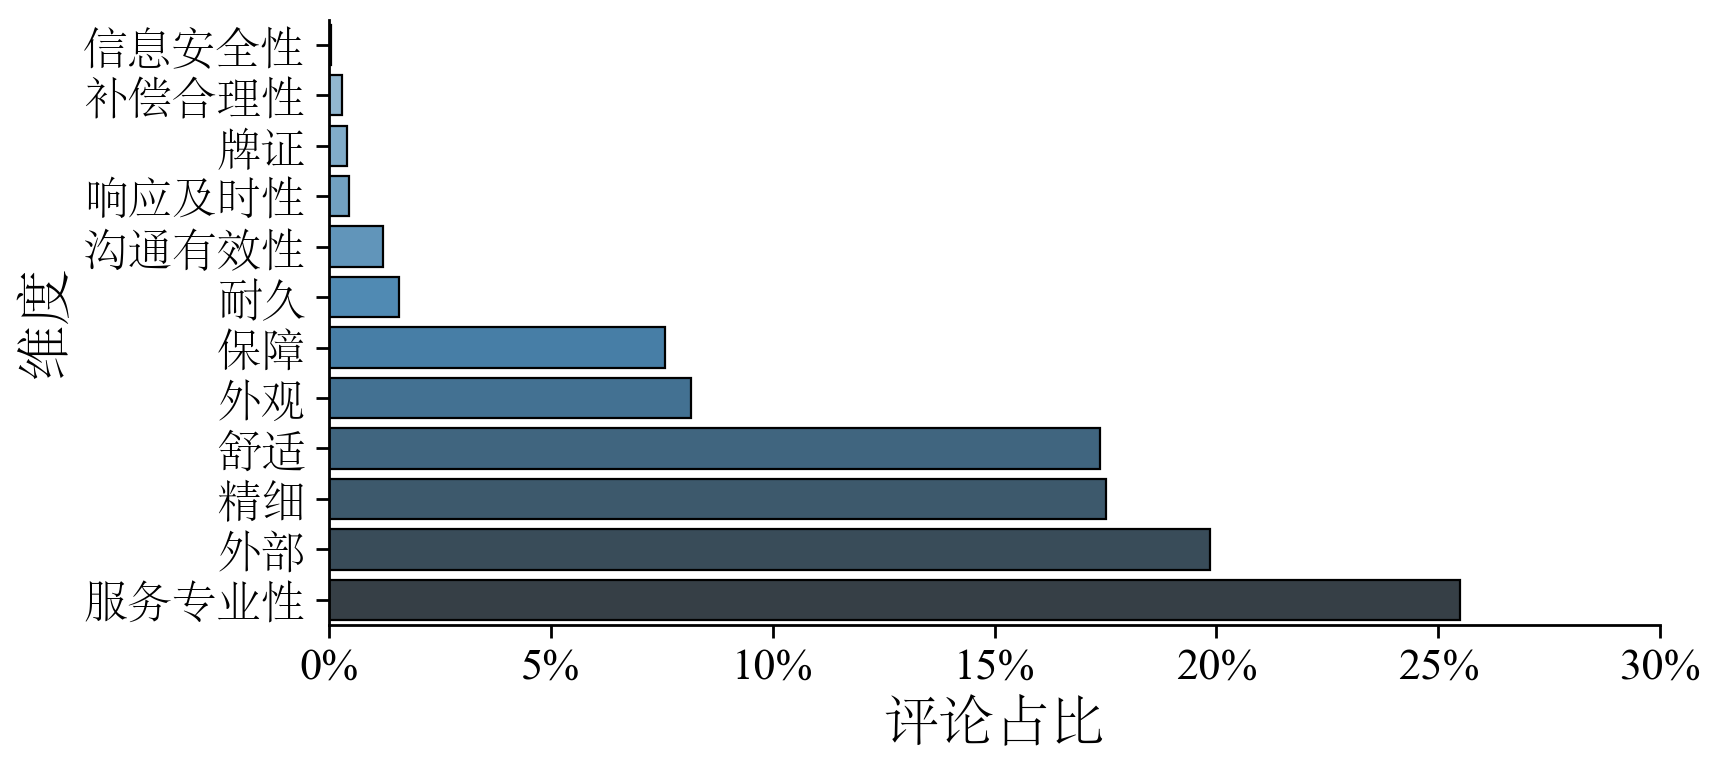

In [3]:
result4 = result2.value_counts(['维度'],normalize=False,sort=True).reset_index()
result4.columns=['维度','数量占比']
result4['数量占比']=result4['数量占比']/result4['数量占比'].sum()
result4=result4.sort_values(['数量占比','维度'],ascending=True)
result4.reset_index(drop=True,inplace=True)

g = sns.catplot(x="数量占比", y="维度",data=result4, kind="bar",height=4, aspect=2,legend=False,sharey=True,sharex=True,errorbar=None,alpha=1,edgecolor='black',palette='Blues_d')

g.set_xlabels('评论占比',fontfamily = config.chinese_fontfamily,fontsize=config.label_fontsize)
g.set_ylabels('维度',fontfamily = config.chinese_fontfamily,fontsize=config.label_fontsize)
g.set_titles("{col_name}",fontfamily = config.english_fontfamily)
g.set_yticklabels(fontfamily = config.chinese_fontfamily,fontsize=config.ticks_fontsize)
g.set_xticklabels(fontfamily = config.english_fontfamily,fontsize=config.ticks_fontsize)
g.set(xlim=(0, 0.3))
config.dpi_for_catplot(g)
config.transform_to_percent(g)

<>:6: DeprecationWarning: invalid escape sequence \p
C:\Users\93461\AppData\Local\Temp\ipykernel_79864\2745449931.py:6: ResourceWarning: unclosed file <_io.TextIOWrapper name='D:\\python_common\\代码_感知质量大论文\\公开数据处理\\感知质量数据集\\label.txt' mode='r' encoding='utf-8'>
  id2label = {k: v.strip() for k, v in enumerate(open('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\label.txt', 'r', encoding='utf-8').readlines())}
C:\Users\93461\AppData\Local\Temp\ipykernel_79864\2745449931.py:44: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data, dtype=np.bool)   #定义一个大小一致全为零的矩阵  用布尔类型
D:\python_common\38_paddlepaddle\lib\site-packages\matplotlib\backends\backend_agg.py

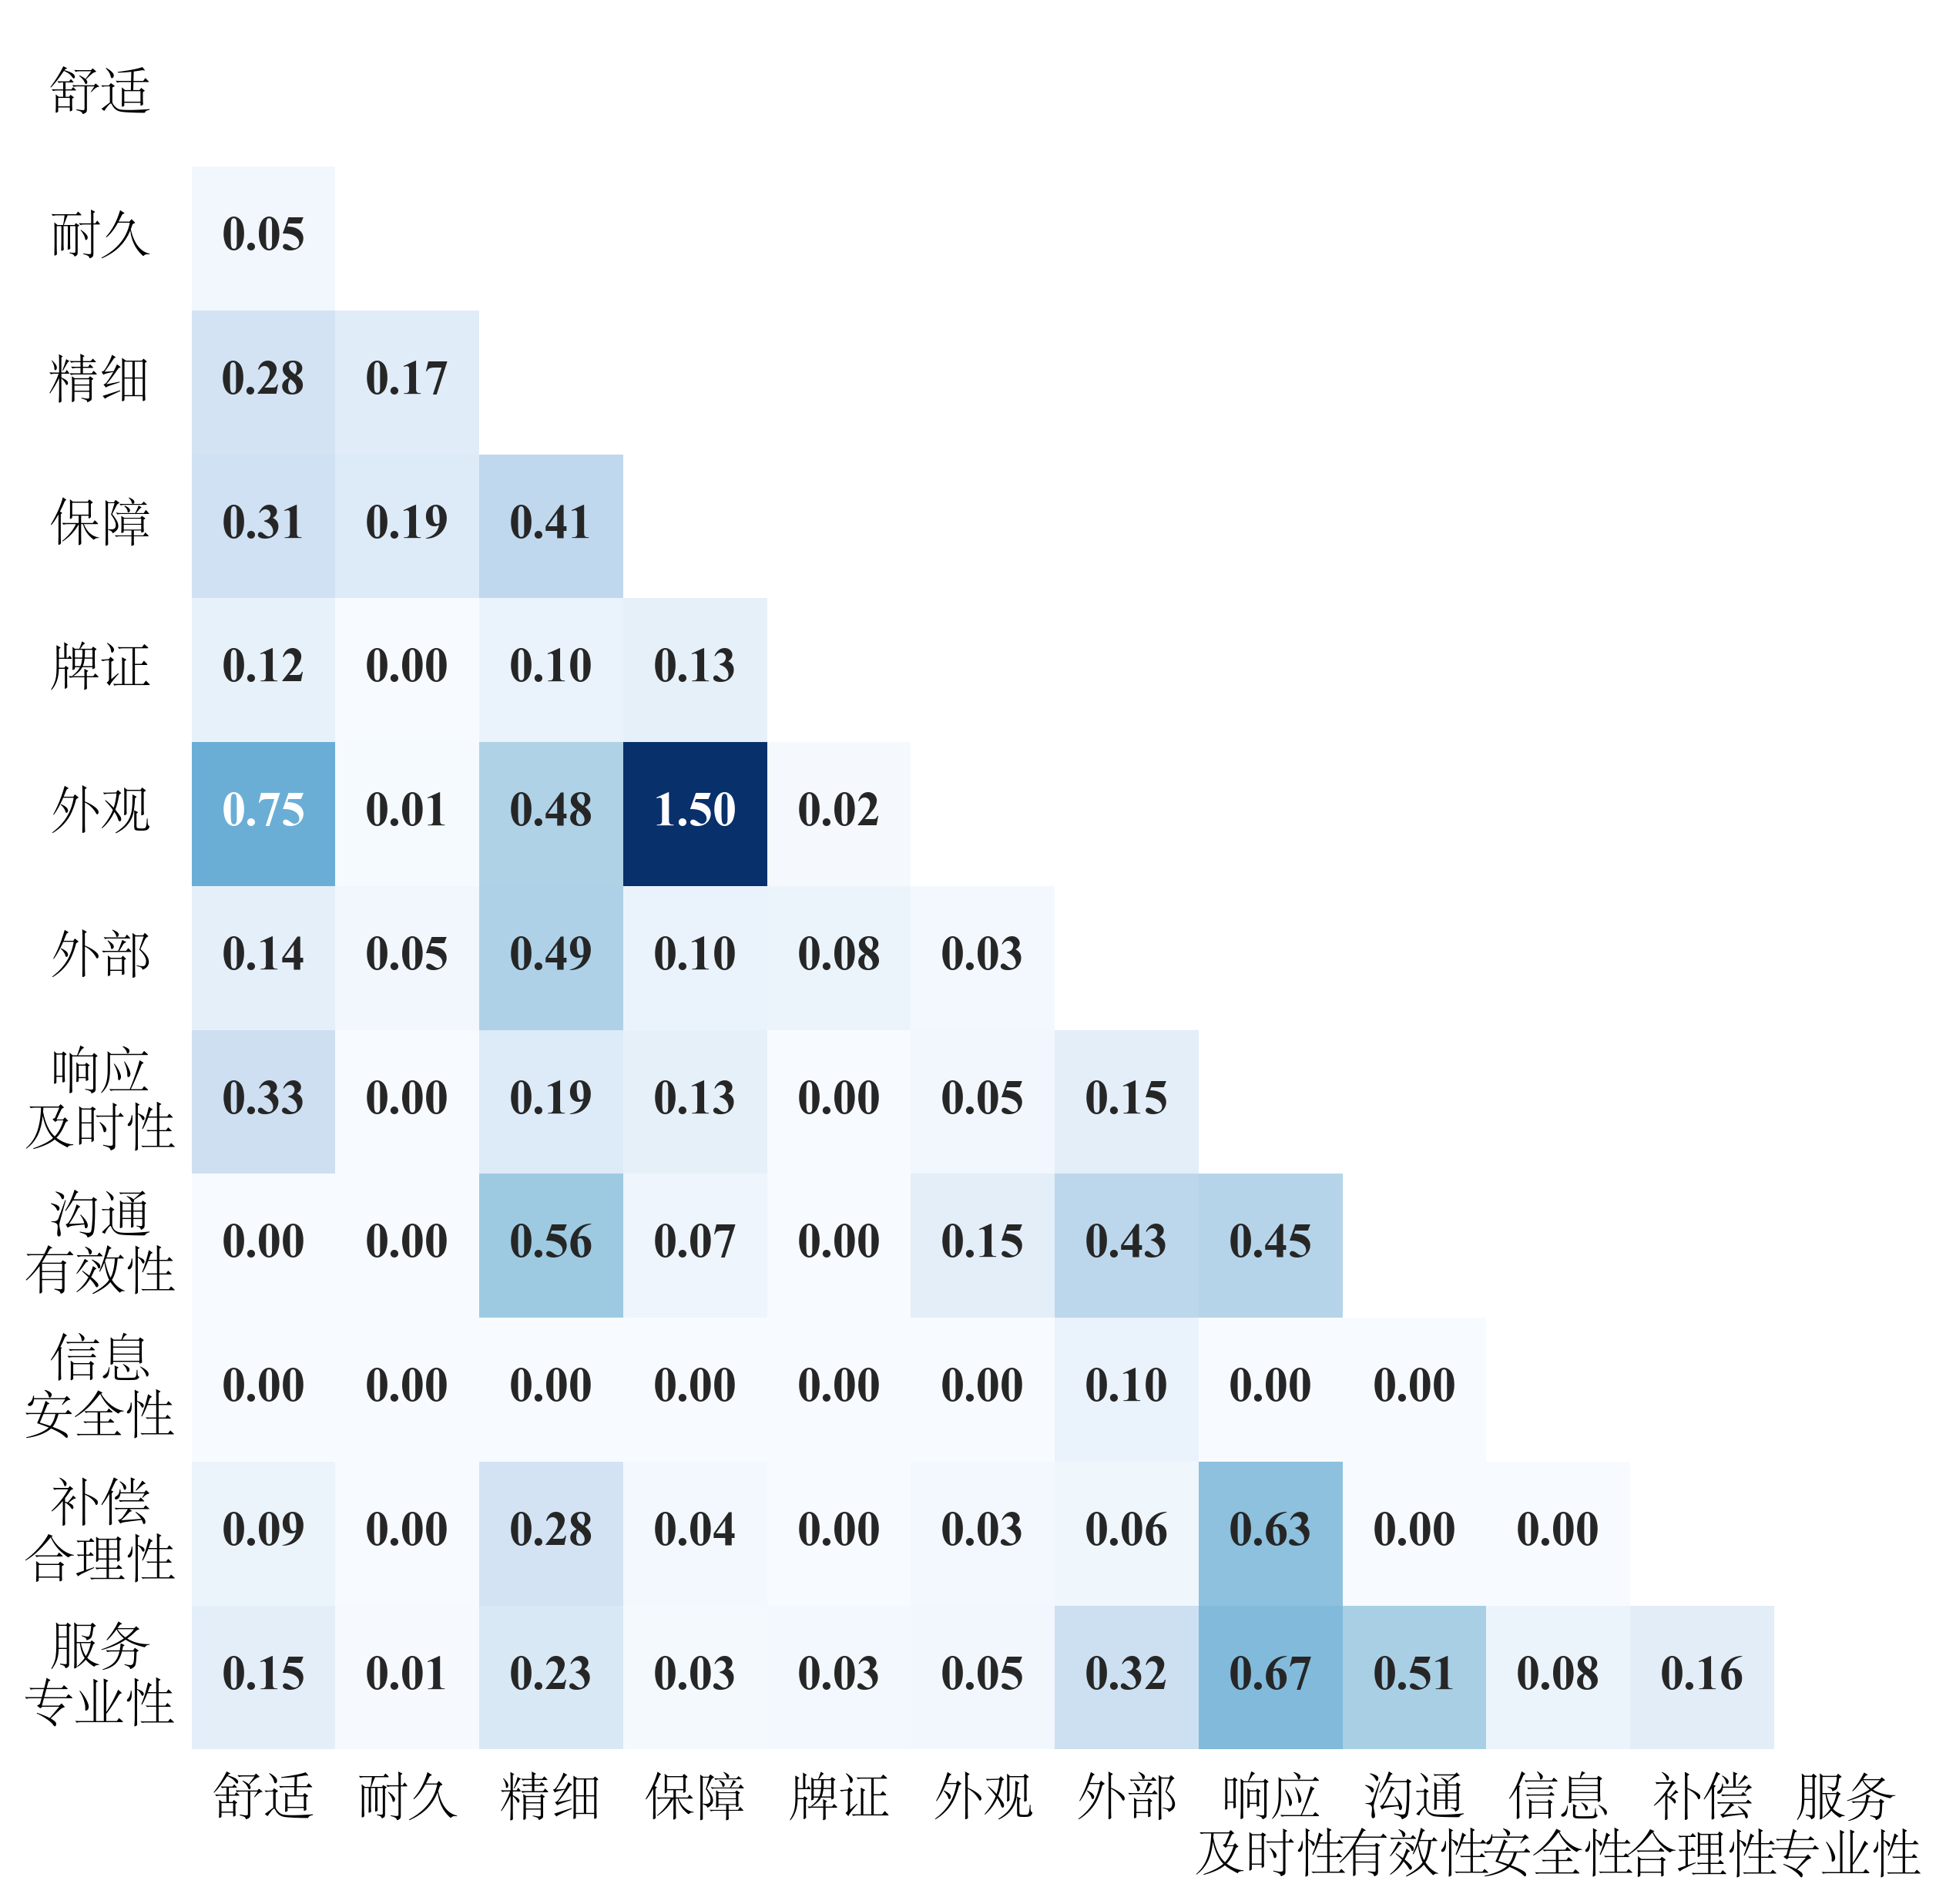

In [23]:
import numpy as np

Data = []
data=np.zeros([12,12])
MI_all=np.zeros([12,12])
id2label = {k: v.strip() for k, v in enumerate(open('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\label.txt', 'r', encoding='utf-8').readlines())}
label2id = {v: k for k, v in id2label.items()}
label2id2 = []
for each in label2id.keys():
    if len(each) > 3:
        label2id2.append(each[:2] + '\n' + each[2:])
    else:
        label2id2.append(each)
for pinpai in pinpaiss:
    with open('D:/python_common/代码_感知质量大论文/公开数据处理/感知质量数据集/维度-情感分类结果/维度-情感分类结果_'+pinpai+'.tsv','r',encoding='utf-8') as f:
        Data.extend(f.readlines())
for each in Data:
    ids,scores,review=each.split('\t')
    if ',' in ids:
        ids_ = ids.split(',')
        for i in range(len(ids_)):
            for j in range(len(ids_)):
                data[int(ids_[i])%12][int(ids_[j])%12]+=1
    else:
        data[int(ids)%12][int(ids)%12]+=1

count_all=sum(sum(data))

data.astype(int)

for i in range(12):
    for j in range(12):
        px=sum(data[i])/count_all
        py=sum(data[j])/count_all
        pxy=data[i][j]/count_all
        MI_all[i][j]=(pxy/(px*py))
        MI_all[i][j]= 0 if i==j else MI_all[i][j]

MI_all=pd.DataFrame(MI_all,index=label2id2,columns=label2id2)

fig, ax = plt.subplots()
ax.xaxis.tick_top()

mask = np.zeros_like(data, dtype=np.bool)   #定义一个大小一致全为零的矩阵  用布尔类型
mask[np.triu_indices_from(mask)]= True      #返回矩阵的上三角，并将其设置为true


sns.heatmap(MI_all, annot=True, ax=ax,fmt='.2f',xticklabels=label2id2,yticklabels=label2id2, annot_kws = {'size': 15, 'weight': 'bold','family':'times new roman'},cbar=False,square=True,mask=mask,cmap='Blues')
# 图的大小
fig.set_size_inches(10, 10)
fig.set_dpi(300)

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# 坐标轴向左平移半个单位
ax.set_xlim(left=-0.45)

plt.xticks(fontsize=16,fontweight='bold',family='STsong',rotation=0)
plt.yticks(fontsize=16,fontweight='bold',family='STsong',rotation=0,va='center',ha='center',rotation_mode='anchor')

plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
plt.show()

In [5]:
#分开的
import matplotlib.pyplot as plt
import pandas as pd
import warnings; warnings.filterwarnings(action='once')
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

data_bert=pd.DataFrame()
for batch_size in ['32','16']:
    for lr in ['1','5']:
        data1=pd.read_csv(r'D:\python_common\英文感知质量代码\log文件夹_softmax\visualdl-scalar-_home_aistudio_log_'+'bert'+'_'+batch_size+'_'+lr+'-train_loss.csv')
        data_bert=pd.concat([data_bert,data1],axis=0)

data_ernie=pd.DataFrame()
for batch_size in ['32','16']:
    for lr in ['1','5']:
        data1=pd.read_csv(r'D:\python_common\英文感知质量代码\log文件夹_softmax\visualdl-scalar-_home_aistudio_log_'+'ernie'+'_'+batch_size+'_'+lr+'-train_loss.csv')
        data_ernie=pd.concat([data_ernie,data1],axis=0)

data_roberta=pd.DataFrame()
for batch_size in ['32','16']:
    for lr in ['1','5']:
        data1=pd.read_csv(r'D:\python_common\英文感知质量代码\log文件夹_softmax\visualdl-scalar-_home_aistudio_log_'+'roberta'+'_'+batch_size+'_'+lr+'-train_loss.csv')
        data_roberta=pd.concat([data_roberta,data1],axis=0)

data_skep=pd.DataFrame()
for batch_size in ['32','16']:
    for lr in ['1','5']:
        data1=pd.read_csv(r'D:\python_common\英文感知质量代码\log文件夹_softmax\visualdl-scalar-_home_aistudio_log_'+'skep'+'_'+batch_size+'_'+lr+'-train_loss.csv')
        data_skep=pd.concat([data_skep,data1],axis=0)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, sharex=True,figsize=(12, 6),dpi=180)

ax0.errorbar(data_bert['step'].tolist()[2040:4080], data_bert['value'].tolist()[2040:4080])
ax0.errorbar(data_bert['step'].tolist()[4080:6120], data_bert['value'].tolist()[4080:6120])
ax0.errorbar(data_bert['step'].tolist()[0:1020], data_bert['value'].tolist()[0:1020])
ax0.errorbar(data_bert['step'].tolist()[1020:2040], data_bert['value'].tolist()[1020:2040])
ax0.legend(['Batch_size:16 Lr:1e-04','Batch_size:16 Lr:1e-05','Batch_size:32 Lr:1e-04','Batch_size:32 Lr:1e-05'],shadow=True,handlelength=1, handletextpad=0.4,fontsize=9)
ax0.set_xlabel('Macbert',fontdict={'size': 15})
ax0.set_ylabel('损失值',fontdict={'size': 15,'fontfamily':'STsong'})


ax1.errorbar(data_ernie['step'].tolist()[2040:4080], data_ernie['value'].tolist()[2040:4080])
ax1.errorbar(data_ernie['step'].tolist()[4080:6120], data_ernie['value'].tolist()[4080:6120])
ax1.errorbar(data_ernie['step'].tolist()[0:1020], data_ernie['value'].tolist()[0:1020])
ax1.errorbar(data_ernie['step'].tolist()[1020:2040], data_ernie['value'].tolist()[1020:2040])
ax1.legend(['Batch_size:16 Lr:1e-04','Batch_size:16 Lr:1e-05','Batch_size:32 Lr:1e-04','Batch_size:32 Lr:1e-05'],shadow=True,handlelength=1, handletextpad=0.4,fontsize=9)
ax1.set_xlabel('Ernie 3.0',fontdict={'size': 15})


ax2.errorbar(data_roberta['step'].tolist()[2040:4080], data_roberta['value'].tolist()[2040:4080])
ax2.errorbar(data_roberta['step'].tolist()[4080:6120], data_roberta['value'].tolist()[4080:6120])
ax2.errorbar(data_roberta['step'].tolist()[0:1020], data_roberta['value'].tolist()[0:1020])
ax2.errorbar(data_roberta['step'].tolist()[1020:2040], data_roberta['value'].tolist()[1020:2040])
ax2.legend(['Batch_size:16 Lr:1e-04','Batch_size:16 Lr:1e-05','Batch_size:32 Lr:1e-04','Batch_size:32 Lr:1e-05'],shadow=True,handlelength=1, handletextpad=0.4,fontsize=9)
ax2.set_xlabel('Roberta',fontdict={'size': 15})


ax3.errorbar(data_skep['step'].tolist()[2040:4080], data_skep['value'].tolist()[2040:4080])
ax3.errorbar(data_skep['step'].tolist()[4080:6120], data_skep['value'].tolist()[4080:6120])
ax3.errorbar(data_skep['step'].tolist()[0:1020], data_skep['value'].tolist()[0:1020])
ax3.errorbar(data_skep['step'].tolist()[1020:2040], data_skep['value'].tolist()[1020:2040])
ax3.legend(['Batch_size:16 Lr:1e-04','Batch_size:16 Lr:1e-05','Batch_size:32 Lr:1e-04','Batch_size:32 Lr:1e-05'],shadow=True,handlelength=1, handletextpad=0.4,fontsize=9)
ax3.set_xlabel('Skep',fontdict={'size': 15})

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\python_common\\英文感知质量代码\\log文件夹_softmax\\visualdl-scalar-_home_aistudio_log_bert_32_1-train_loss.csv'